In [1]:
import pandas as pd
import numpy as np
from functools import reduce
# Đường dẫn tương đối tới tệp CSV
df = pd.read_csv('BL-Flickr-Images-Book.csv')

# Hiển thị 5 dòng đầu tiên của DataFrame
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [2]:
# Overview of the data structure
df.info()

# Summary statistics of numerical columns
df.describe()

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [3]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace = True, axis = 1)
df = df.set_index('Identifier')
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [4]:
# Clean Date of Publication
unwanted_characters = ['[', ',', '-']

def clean_dates(item):
    dop= str(item.loc['Date of Publication'])
    
    if dop == 'nan' or dop[0] == '[':
        return np.nan
    
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    
    return dop

df['Date of Publication'] = df.apply(clean_dates, axis = 1)

In [5]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [6]:
def clean_author_names(item):
    
    author = str(item.loc['Author'])
    
    if author == 'nan':
        return np.nan
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name
    
    if first_name.endswith(('.', '.|')):
        parts = first_name.split('.')
        
        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence + 1)
            first_name = first_name[:final_occurence]
        else:
            first_name = first_name[:first_name.find('.')]
    
    last_name = last_name.capitalize()
    
    return f'{first_name} {last_name}'


df['Author'] = df.apply(clean_author_names, axis = 1)

In [7]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,AA,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [8]:
def clean_publication_place(item):
    place = str(item['Place of Publication'])
    
    if 'London' in place:
        return 'London'
    if 'Oxford' in place:
        return 'Oxford'
    if place == 'Newcastle upon Tyne':
        return 'Newcastle-upon-Tyne'
    
    return place
    
df['Place of Publication'] = df.apply(clean_publication_place, axis = 1)

In [9]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,AA,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [10]:
def clean_title(item):
    title = str(item['Title'])
    
    if title == 'nan':
        return np.NaN
    
    if title[0] == '[':
        title = title[1: title.find(']')]
        
    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]
        
    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df.apply(clean_title, axis = 1)

In [11]:
df

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...
4158088,London,1838,NaN,"The Parochial History Of Cornwall, Founded On",afterwards GILBERT Giddy,http://www.flickr.com/photos/britishlibrary/ta...
4158128,Derby,1831,M. Mozley & Son,The History And Gazetteer Of The County Of D,Stephen Glover,http://www.flickr.com/photos/britishlibrary/ta...
4159563,London,NaN,T. Cadell and W. Davies,Magna Britannia; Being A Concise Topographical...,Daniel Lysons,http://www.flickr.com/photos/britishlibrary/ta...


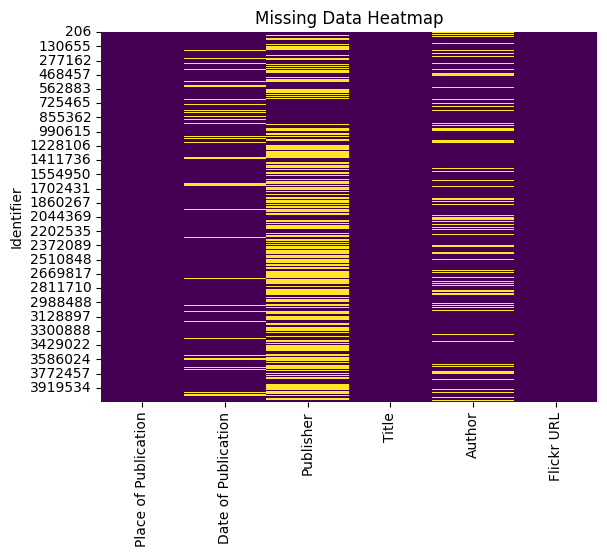

In [12]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [13]:
# Ensure no missing values in critical columns with better debugging
title_missing = df['Title'].isnull().sum()
assert title_missing == 0, f"There are {title_missing} missing values in the 'Title' column."

In [14]:
# Missing values summary
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_summary)

Missing values per column:
 Publisher               4195
Author                  1778
Date of Publication      967
Place of Publication       0
Title                      0
Flickr URL                 0
dtype: int64


In [15]:
def handle_missing_values(df):
    """
    Hàm xử lý các giá trị thiếu trong các cột Publisher, Author, và Date of Publication.
    
    Args:
    df (pd.DataFrame): DataFrame chứa dữ liệu cần xử lý.
    
    Returns:
    pd.DataFrame: DataFrame sau khi đã xử lý các giá trị thiếu.
    """
    
    # Xử lý giá trị thiếu trong cột Publisher
    df['Publisher'] = df['Publisher'].fillna("Unknown Publisher")
    
    # Xử lý giá trị thiếu trong cột Author
    df['Author'] = df['Author'].fillna("Unknown Author")
    
    # Xử lý giá trị thiếu trong cột Date of Publication
    df['Date of Publication'] = df['Date of Publication'].fillna("Unknown")
    
    return df

# Sử dụng hàm trên DataFrame
df = handle_missing_values(df)


In [16]:
df

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...
4158088,London,1838,Unknown Publisher,"The Parochial History Of Cornwall, Founded On",afterwards GILBERT Giddy,http://www.flickr.com/photos/britishlibrary/ta...
4158128,Derby,1831,M. Mozley & Son,The History And Gazetteer Of The County Of D,Stephen Glover,http://www.flickr.com/photos/britishlibrary/ta...
4159563,London,Unknown,T. Cadell and W. Davies,Magna Britannia; Being A Concise Topographical...,Daniel Lysons,http://www.flickr.com/photos/britishlibrary/ta...


In [17]:
# Missing values summary
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_summary)

Missing values per column:
 Place of Publication    0
Date of Publication     0
Publisher               0
Title                   0
Author                  0
Flickr URL              0
dtype: int64


In [18]:
df.dtypes

Place of Publication    object
Date of Publication     object
Publisher               object
Title                   object
Author                  object
Flickr URL              object
dtype: object

In [19]:
# Export to Excel
df.to_excel('cleaned_data.xlsx', index=False)